In [1]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 185 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=1e33999b9ca7dcfefa98f9d6891ac1408dc302916c7e4c45e1f0a66bae2053c6
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# raw data 바꿔가면서 분석
raw_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/데이터.csv', index_col = 0, encoding = 'cp949')
raw_data = raw_data.drop("REFYM", axis = 1)

# 분석에 이용할 컬럼 바꾸고 싶으면 meaning list 수정
meaning_list_app = raw_data.columns.tolist()[48:]
raw_data["유동인구"] = raw_data["승차인원"]+raw_data["하차인원"]

meaning_list = ['유동인구','FAR', 'RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT','단독주택','공동주택','제1종근린생활시설','제2종근린생활시설','업무시설','의료시설','노유자시설','종교시설','교육연구시설','자동차관련시설','창고시설','문화및집회시설','공장','위험물저장및처리시설','동.식물관련시설','판매시설','숙박시설','운동시설','분뇨.쓰레기처리시설','자원순환관련시설','근린생활시설','방송통신시설','교육연구및복지시설','운수시설','판매및영업시설','위락시설','교정및군사시설','수련시설',
 '장례시설','발전시설','공공용시설','관광휴게시설','야영장시설','묘지관련시설','다세대주택']
data= raw_data.loc[:, meaning_list]
data = data.dropna(axis=0)




#클러스터링 포함
cl_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/클러스터데이터3.csv', index_col = 0, encoding = 'cp949')
data = data.loc[cl_data.index.tolist()]

In [4]:
data.shape

(19, 42)

In [5]:
cl_data.shape

(19, 7)

In [6]:
data.head()

유동인구         FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
가산디지털단지역  6488760.0   57.151795          0.040          0.064   
공항화물청사역    253294.0  248.322632          0.000          0.000   
군포역        797992.0   24.635344          0.261          0.116   
금정역       2859134.0   26.768958          0.262          0.240   
남동인더스파크역   237640.0   12.268370          0.000          0.151   

          MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT   단독주택   공동주택  \
가산디지털단지역            0.032          0.864        0.000  242.0   33.0   
공항화물청사역             0.000          1.000        0.000    0.0    0.0   
군포역                 0.056          0.562        0.004  411.0  296.0   
금정역                 0.117          0.259        0.122  870.0  342.0   
남동인더스파크역            0.000          0.849        0.000    0.0    0.0   

          제1종근린생활시설  ...  위락시설  교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  \
가산디지털단지역       38.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
공항화물청사역         0.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
군포역           158.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   
금정역           171.0  ...   3.0      0.0   0.0   0.0   0.0    0.0     0.0   
남동인더스파크역       20.0  ...   0.0      0.0   0.0   0.0   0.0    0.0     0.0   

          야영장시설  묘지관련시설  다세대주택  
가산디지털단지역    0.0     0.0    0.0  
공항화물청사역     0.0     0.0    0.0  
군포역         0.0     0.0    0.0  
금정역         0.0     0.0    0.0  
남동인더스파크역    0.0     0.0    0.0  

[5 rows x 42 columns]

In [7]:
data.describe()

유동인구         FAR  RESDT_AREA_RT  COMRC_AREA_RT  \
count  1.900000e+01   19.000000      19.000000      19.000000   
mean   1.376569e+06   39.260971       0.244737       0.162316   
std    1.556430e+06   52.628539       0.159140       0.143942   
min    1.954640e+05    3.757561       0.000000       0.000000   
25%    5.574440e+05   20.559602       0.131000       0.076000   
50%    8.740600e+05   24.204992       0.261000       0.135000   
75%    1.308851e+06   38.232199       0.346000       0.206000   
max    6.488760e+06  248.322632       0.527000       0.656000   

       MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT        단독주택        공동주택  \
count        19.000000      19.000000    19.000000   19.000000   19.000000   
mean          0.059211       0.500211     0.033263  301.157895  193.315789   
std           0.048102       0.206840     0.066757  275.916304  133.141551   
min           0.000000       0.259000     0.000000    0.000000    0.000000   
25%           0.008000       0.371000     0.000000   68.000000   85.500000   
50%           0.056000       0.462000     0.000000  273.000000  201.000000   
75%           0.099500       0.559500     0.021000  429.500000  301.500000   
max           0.145000       1.000000     0.242000  870.000000  381.000000   

        제1종근린생활시설  ...       위락시설    교정및군사시설  수련시설  장례시설  발전시설  공공용시설  관광휴게시설  \
count   19.000000  ...  19.000000  19.000000  19.0  19.0  19.0   19.0    19.0   
mean   132.473684  ...   2.210526   0.105263   0.0   0.0   0.0    0.0     0.0   
std    163.867619  ...   4.802533   0.458831   0.0   0.0   0.0    0.0     0.0   
min      0.000000  ...   0.000000   0.000000   0.0   0.0   0.0    0.0     0.0   
25%     35.000000  ...   0.000000   0.000000   0.0   0.0   0.0    0.0     0.0   
50%     89.000000  ...   0.000000   0.000000   0.0   0.0   0.0    0.0     0.0   
75%    164.500000  ...   1.000000   0.000000   0.0   0.0   0.0    0.0     0.0   
max    692.000000  ...  17.000000   2.000000   0.0   0.0   0.0    0.0     0.0   

       야영장시설  묘지관련시설  다세대주택  
count   19.0    19.0   19.0  
mean     0.0     0.0    0.0  
std      0.0     0.0    0.0  
min      0.0     0.0    0.0  
25%      0.0     0.0    0.0  
50%      0.0     0.0    0.0  
75%      0.0     0.0    0.0  
max      0.0     0.0    0.0  

[8 rows x 42 columns]

In [8]:
lst = data.describe().loc['max']
col_list = lst[lst.values>100].index.tolist()
col_list = col_list + ['RESDT_AREA_RT', 'COMRC_AREA_RT', 'MIXBLDG_AREA_RT', 'INDST_AREA_RT', 'ETC_AREA_RT']
col_list

['유동인구',
 'FAR',
 '단독주택',
 '공동주택',
 '제1종근린생활시설',
 '제2종근린생활시설',
 '교육연구시설',
 '창고시설',
 '문화및집회시설',
 '공장',
 '숙박시설',
 '운수시설',
 'RESDT_AREA_RT',
 'COMRC_AREA_RT',
 'MIXBLDG_AREA_RT',
 'INDST_AREA_RT',
 'ETC_AREA_RT']

In [9]:
data= data.loc[:, col_list]
data = data.dropna(axis=0)
data

유동인구         FAR   단독주택   공동주택  제1종근린생활시설  제2종근린생활시설  교육연구시설  \
가산디지털단지역  6488760.0   57.151795  242.0   33.0       38.0       57.0    17.0   
공항화물청사역    253294.0  248.322632    0.0    0.0        0.0        0.0     0.0   
군포역        797992.0   24.635344  411.0  296.0      158.0      111.0     4.0   
금정역       2859134.0   26.768958  870.0  342.0      171.0      137.0    10.0   
남동인더스파크역   237640.0   12.268370    0.0    0.0       20.0       14.0    13.0   
당정역        634900.0   20.192183   77.0  307.0       34.0       74.0    49.0   
독산역       1925796.0   33.701861   59.0  201.0       36.0       74.0    25.0   
망포역       1509368.0   42.797493   82.0  245.0       47.0      232.0    72.0   
명학역        931088.0   30.228145  371.0  271.0       92.0       93.0    11.0   
부평구청역      754558.0   59.722901  273.0  374.0       89.0       82.0    14.0   
선유도역       874060.0   22.598796  200.0  198.0      171.0      157.0    29.0   
성수역       3976170.0   42.762537  292.0  165.0      143.0      195.0    25.0   
신포역        195464.0   20.927021  692.0   78.0      692.0      207.0    69.0   
오산역       1108334.0   21.908652  448.0  246.0      354.0      227.0    28.0   
의왕역        962982.0   13.395783  288.0  345.0      108.0       73.0    22.0   
인천역        479988.0   24.204992  757.0   98.0      257.0      125.0   202.0   
청라국제도시역    693302.0    3.757561    0.0    0.0        0.0        0.0     8.0   
춘의역       1039172.0   23.560006  648.0  381.0       88.0      113.0     4.0   
호구포역       432812.0   17.053417   12.0   93.0       19.0       11.0     0.0   

           창고시설  문화및집회시설      공장   숙박시설    운수시설  RESDT_AREA_RT  COMRC_AREA_RT  \
가산디지털단지역    3.0      0.0   115.0   12.0     0.0          0.040          0.064   
공항화물청사역     0.0      0.0     0.0    0.0  1470.0          0.000          0.000   
군포역        12.0      0.0   228.0   21.0     0.0          0.261          0.116   
금정역         5.0      1.0   151.0   31.0     0.0          0.262          0.240   
남동인더스파크역    6.0      0.0   321.0    0.0     0.0          0.000          0.151   
당정역        44.0      0.0    27.0    0.0     0.0          0.465          0.070   
독산역        25.0      0.0   237.0    3.0     0.0          0.416          0.019   
망포역         1.0      0.0    63.0    0.0     1.0          0.527          0.082   
명학역        20.0      9.0   605.0   37.0     0.0          0.160          0.188   
부평구청역       4.0      0.0  1112.0    3.0     0.0          0.387          0.100   
선유도역       16.0      0.0    48.0    4.0     0.0          0.312          0.200   
성수역        36.0      0.0   264.0    2.0     0.0          0.236          0.262   
신포역        47.0     29.0     1.0   25.0     8.0          0.102          0.212   
오산역        22.0      0.0    48.0  152.0     0.0          0.248          0.288   
의왕역         3.0      1.0    46.0   13.0     0.0          0.356          0.059   
인천역       115.0    177.0   273.0   38.0     4.0          0.300          0.135   
청라국제도시역    21.0      0.0    20.0    0.0     0.0          0.000          0.656   
춘의역         4.0      3.0   334.0    0.0     0.0          0.242          0.135   
호구포역        0.0      1.0   242.0    4.0     0.0          0.336          0.107   

          MIXBLDG_AREA_RT  INDST_AREA_RT  ETC_AREA_RT  
가산디지털단지역            0.032          0.864        0.000  
공항화물청사역             0.000          1.000        0.000  
군포역                 0.056          0.562        0.004  
금정역                 0.117          0.259        0.122  
남동인더스파크역            0.000          0.849        0.000  
당정역                 0.145          0.282        0.037  
독산역                 0.011          0.553        0.002  
망포역                 0.005          0.386        0.000  
명학역                 0.084          0.491        0.077  
부평구청역               0.050          0.462        0.000  
선유도역                0.125          0.363        0.000  
성수역                 0.059          0.442        0.000  
신포역                 0.105          0.581        0.000  
오산역                 0.055    

In [10]:
from sklearn.preprocessing import StandardScaler
scaled2 = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
scaled2.mean(axis=0)

유동인구              -3.505967e-17
FAR                1.606902e-16
단독주택               9.349247e-17
공동주택              -5.843279e-17
제1종근린생활시설         -1.110223e-16
제2종근린생활시설          9.349247e-17
교육연구시설            -2.337312e-17
창고시설               2.337312e-17
문화및집회시설            3.213803e-17
공장                 3.213803e-17
숙박시설              -4.382459e-17
운수시설               2.045148e-17
RESDT_AREA_RT     -5.843279e-17
COMRC_AREA_RT     -2.162013e-16
MIXBLDG_AREA_RT    1.285521e-16
INDST_AREA_RT      1.752984e-16
ETC_AREA_RT       -2.921640e-17
dtype: float64

In [11]:
scaled = scaled2.drop(['유동인구'], axis=1)


In [12]:
pca = PCA(random_state=312)
X_p = pca.fit_transform(scaled)

In [13]:
fa = FactorAnalyzer(n_factors=scaled.shape[1], rotation=None)
fa.fit(scaled)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [4.96284033e+00 3.14389684e+00 1.88627584e+00 1.67699050e+00
 1.19343813e+00 1.07130026e+00 6.63725216e-01 5.85993100e-01
 3.60827751e-01 1.99963470e-01 1.34836627e-01 6.49475435e-02
 3.05889185e-02 1.81605753e-02 6.21300520e-03 1.89841829e-06] 

적합한 PC 개수: 6


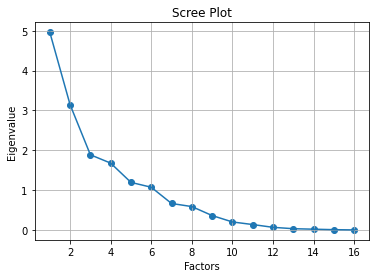

In [14]:
#Scatter plot
plt.scatter(range(1, scaled.shape[1]+1),ev)
plt.plot(range(1,scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio)

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum)

분산 설명 비율:
 [3.10177521e-01 1.96493552e-01 1.17892240e-01 1.04811906e-01
 7.45898829e-02 6.69562665e-02 4.14828260e-02 3.66245687e-02
 2.25517345e-02 1.24977169e-02 8.42728921e-03 4.05922147e-03
 1.91180740e-03 1.13503596e-03 3.88312825e-04 1.18651143e-07]
누적 분산 설명 비율:
 [0.31017752 0.50667107 0.62456331 0.72937522 0.8039651  0.87092137
 0.91240419 0.94902876 0.9715805  0.98407821 0.9925055  0.99656473
 0.99847653 0.99961157 0.99999988 1.        ]


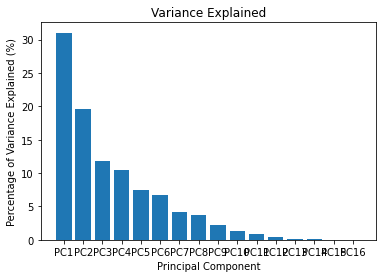

In [16]:
# 누적 분산비율 그래프
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [17]:
t = 6 #pc 개수 조정
pca = PCA(n_components=t,random_state=312)
x_p = pca.fit_transform(scaled)

In [18]:
pc_list = []
for i in range(0,t):
  pc_list.append(f"PC{i+1}")

pd.DataFrame(pca.components_.T, 
             columns = pc_list, 
             index=scaled.columns)

PC1       PC2       PC3       PC4       PC5       PC6
FAR              0.283460  0.159142 -0.322836  0.358842  0.040003 -0.028560
단독주택            -0.334103  0.082422 -0.037059  0.312630 -0.228473  0.290232
공동주택            -0.235549 -0.412207 -0.226698  0.131496  0.054844  0.113312
제1종근린생활시설       -0.274182  0.226329  0.161405  0.333629  0.138791  0.095880
제2종근린생활시설       -0.310829  0.021576  0.061143  0.242055  0.474542 -0.103559
교육연구시설          -0.260382  0.363044 -0.236408 -0.217552  0.013052 -0.136410
창고시설            -0.262431  0.382737 -0.116601 -0.211923 -0.112234 -0.046343
문화및집회시설         -0.216229  0.393674 -0.238147 -0.198703 -0.199579  0.079637
공장              -0.011272 -0.148945 -0.208282 -0.212853  0.077112  0.815157
숙박시설            -0.187727  0.105913  0.228842  0.331323  0.287096  0.154521
운수시설             0.285421  0.181887 -0.255090  0.371390 -0.077121 -0.135590
RESDT_AREA_RT   -0.212870 -0.253039 -0.340496 -0.209830  0.375824 -0.268869
COMRC_AREA_RT   -0.066085  0.053392  0.609015 -0.112228 -0.202846  0.015557
MIXBLDG_AREA_RT -0.331441 -0.067234 -0.129703  0.194284 -0.276414 -0.071411
INDST_AREA_RT    0.326135  0.275290 -0.093883  0.119805  0.088399  0.245469
ETC_AREA_RT     -0.120811 -0.315179 -0.117166  0.229885 -0.534053 -0.102300

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31017752, 0.50667107, 0.62456331, 0.72937522, 0.8039651 ,
       0.87092137])

In [20]:
pc_list = []
for i in range(0,t):
  app = f"PC{i+1}"
  pc_list.append(app)
print(pc_list)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [21]:
x_pp = pd.DataFrame(x_p, 
                    columns = pc_list, 
                    index = scaled.index)
x_pp

PC1       PC2       PC3       PC4       PC5       PC6
가산디지털단지역  2.291304  0.907833  0.353286  0.082433 -0.094526  0.411652
공항화물청사역   6.031304  2.397505 -2.040775  2.637197 -0.390329 -0.616213
군포역      -0.079013 -0.611547  0.047834  0.329220  0.528716  0.468001
금정역      -2.080904 -1.580068  0.344392  1.611616 -1.210710  0.136535
남동인더스파크역  2.887071  0.739906  0.996029 -1.176903 -0.330635  0.907250
당정역      -1.191842 -1.096063 -1.234880 -0.895758 -0.254499 -1.710525
독산역       0.939938 -0.505559 -0.875011 -1.212194  1.042171 -0.379522
망포역      -0.234557 -0.790246 -0.762161 -0.776746  2.292058 -1.580522
명학역      -0.379443 -0.830264  0.016996  0.212304 -0.595343  1.566403
부평구청역     0.192943 -1.818962 -1.509985 -0.890187  0.957027  2.723271
선유도역     -0.866206 -0.431613  0.356688 -0.001597  0.312892 -1.049737
성수역      -0.427428  0.212388  0.607173 -0.228642  0.573877 -0.078472
신포역      -2.406587  2.680457  1.197736  1.681800  0.206650  0.108548
오산역      -2.153794  0.578023  2.149996  2.112354  2.070252  0.202570
의왕역      -1.015659 -2.598886 -0.818432  0.663525 -1.660780 -1.190762
인천역      -4.114918  4.917441 -2.092025 -1.720093 -0.977408  0.262141
청라국제도시역   1.772053  0.531877  3.650510 -1.878817 -1.554186 -0.597404
춘의역      -1.105036 -2.073849 -0.570716  0.881769 -1.374369  0.536763
호구포역      1.940774 -0.628374  0.183346 -1.431279  0.459142 -0.119975

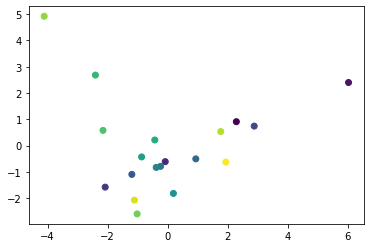

In [22]:
# 2차원 plot
plt.scatter(x=x_pp['PC1'],y=x_pp['PC2'], c = range(0,len(x_pp.index.tolist())))

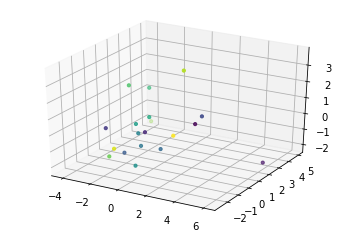

In [23]:
# 3차원 plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(x_pp['PC1'],x_pp['PC2'],x_pp['PC3'], s=10, c = range(0,len(x_pp.index.tolist())))
plt.show()

In [24]:
x_pp.describe()

PC1           PC2           PC3           PC4           PC5  \
count  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01  1.900000e+01   
mean  -3.272236e-16 -3.505967e-17  1.183264e-16 -4.674623e-17  5.843279e-17   
std    2.288789e+00  1.821691e+00  1.411052e+00  1.330472e+00  1.122382e+00   
min   -4.114918e+00 -2.598886e+00 -2.092025e+00 -1.878817e+00 -1.660780e+00   
25%   -1.148439e+00 -9.631633e-01 -8.467212e-01 -1.036331e+00 -7.863753e-01   
50%   -3.794425e-01 -5.055591e-01  4.783390e-02 -1.597341e-03 -9.452627e-02   
75%    1.355996e+00  6.589648e-01  4.819304e-01  7.726468e-01  5.512965e-01   
max    6.031304e+00  4.917441e+00  3.650510e+00  2.637197e+00  2.292058e+00   

                PC6  
count  1.900000e+01  
mean   1.869849e-16  
std    1.063399e+00  
min   -1.710525e+00  
25%   -6.068087e-01  
50%    1.085479e-01  
75%    4.398263e-01  
max    2.723271e+00

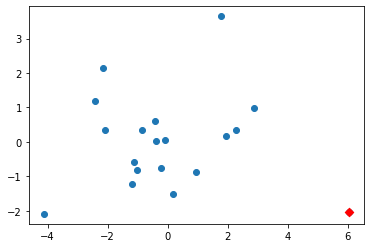

In [25]:
# Principal Component Pattern Plot 1
plt.scatter(x=x_pp['PC1'],y=x_pp['PC3'])
plt.scatter(x=x_pp.iloc[1,0], y=x_pp.iloc[1,2], marker='D', c='r')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
train_dataset, test_dataset = train_test_split(scaled2, train_size=0.7, test_size=0.3, random_state=312)
train_y = train_dataset[['유동인구']]
test_y = test_dataset[['유동인구']]
train = train_dataset.drop(['유동인구'], axis=1)
test = test_dataset.drop(['유동인구'], axis=1)

In [28]:
#scale_train = pd.DataFrame(StandardScaler().fit_transform(train), columns=train.columns, index = train.index)
#scale_test = pd.DataFrame(StandardScaler().fit_transform(test), columns=test.columns, index = test.index)

pca = PCA(n_components = t)
pdComp1 = pca.fit_transform(train)
pdComp2 = pca.fit_transform(test)
train_p = pd.DataFrame(data = pdComp1, columns = pc_list)
test_p = pd.DataFrame(data = pdComp2, columns = pc_list)

In [29]:
#scale the training and testing data
X_nopca_train = scale(train)
X_nopca_test = scale(test)

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_nopca_train[:,:], train_y)

#calculate RMSE
pred1 = regr.predict(X_nopca_test)
np.sqrt(mean_squared_error(test_y, pred1))


2.925519113748163

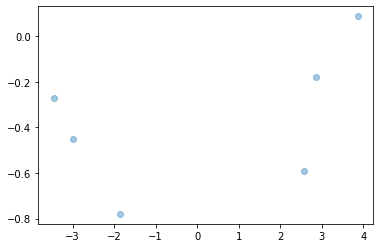

R2 =  -106.1017463589197


In [30]:
plt.scatter(pred1, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred1)
print('R2 = ', r2)

In [31]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(train))
X_reduced_test = pca.transform(scale(test))[:,:]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:], train_y)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(test_y, pred))


1.000559156577004

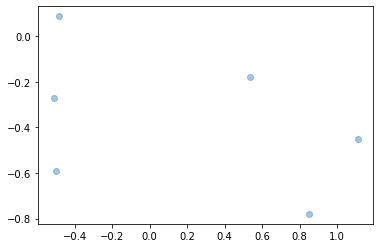

R2 =  -11.527840458358476


In [32]:
plt.scatter(pred, test_y, alpha = 0.4)
plt.show()

r2 = r2_score(y_true = test_y, y_pred = pred)
print('R2 = ', r2)

In [33]:
regr.coef_

array([[-0.03817786, -0.01079088, -0.24427838, -0.3470927 ,  0.06902849,
        -0.12499073]])

In [34]:
regr.intercept_

array([0.16807091])

In [35]:
train_y_prime = train_y.reset_index()
merge_df = pd.concat([train_p, train_y_prime], axis = 1)
merge_df = merge_df.set_index('index')
print(merge_df)

               PC1       PC2       PC3       PC4       PC5       PC6      유동인구
index                                                                         
남동인더스파크역  2.276412 -1.976496 -0.051798 -1.506044 -0.111900  0.632817 -0.751809
부평구청역    -1.114617 -1.007515  2.888348  1.607378  0.492779  0.125577 -0.410591
성수역      -0.795472 -0.044910 -0.651266 -0.235763  1.783713 -0.331169  1.716001
당정역      -1.899262  0.294568 -1.902533  1.795968 -0.644297  0.908446 -0.489577
독산역       0.266026 -1.285142 -0.483658  1.117386 -0.433243 -0.725520  0.362546
명학역      -1.113670  0.145909  1.183143 -0.565648  0.169598  0.860305 -0.294063
춘의역      -2.178789  1.347098  0.817230 -0.616058 -0.976096  0.035681 -0.222716
선유도역     -1.404385  0.365885 -1.589333  0.190302  0.873914  0.130786 -0.331707
호구포역      0.950920 -1.774659 -0.331874  0.236852 -0.846633 -0.646351 -0.622976
금정역      -2.809126  2.070795  0.186010 -1.172504 -0.379942 -0.512343  0.978644
공항화물청사역   6.477424  2.576385  0.299534  0.874913  0.

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [37]:
ols('유동인구 ~ PC1', data=merge_df).fit().summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유동인구   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                   0.01481
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.905
Time:                        04:03:53   Log-Likelihood:                -20.317
No. Observations:                  13   AIC:                             44.63
Df Residuals:                      11   BIC:                             45.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1681      0.348      0.483      0.639      -0.598       0.934
PC1           -0.0178      0.146     -0.122      0.905      -0.339       0.303
==============================================================================
Omnibus:                       14.113   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.237
Skew:                           1.771   Prob(JB):                      0.00987
Kurtosis:                       5.123   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = ols('유동인구 ~ PC1', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq   mean_sq         F    PR(>F)
PC1        1.0   0.023344  0.023344  0.014814  0.905323
Residual  11.0  17.334318  1.575847       NaN       NaN

In [39]:
print('{:.20f}'.format(sm.stats.anova_lm(model, typ=1)['PR(>F)'][0]))

0.90532285737790452185


In [40]:
model = ols('유동인구 ~ PC1+PC2+PC3+PC4+PC5+PC6', data=merge_df).fit()
sm.stats.anova_lm(model, typ=1)

df     sum_sq   mean_sq         F    PR(>F)
PC1       1.0   0.023344  0.023344  0.011552  0.917911
PC2       1.0   0.003066  0.003066  0.001517  0.970193
PC3       1.0   0.442098  0.442098  0.218783  0.656475
PC4       1.0   3.261688  3.261688  1.614127  0.250951
PC5       1.0   1.071146  1.071146  0.530083  0.493994
PC6       1.0   0.432040  0.432040  0.213806  0.660094
Residual  6.0  12.124280  2.020713       NaN       NaN

In [41]:
variables = sm.stats.anova_lm(model, typ=1).index.tolist()
pvalues = sm.stats.anova_lm(model, typ=1)['PR(>F)'].tolist()

for variable, pvalue in zip(variables, pvalues):
    
    print(variable, '\t', '{:.20f}'.format(pvalue))

PC1 	 0.91791077547379307244
PC2 	 0.97019330866910513667
PC3 	 0.65647506587481485596
PC4 	 0.25095141385960662017
PC5 	 0.49399369361841183323
PC6 	 0.66009378542044128135
Residual 	 nan
